# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project:

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns


In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter= ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter= ';')

In [3]:
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  ...  PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3  ...         NaN         NaN   
1                      4                 5  ...         2.0         3.0   
2                      3                 5  ...         3.0         3.0   
3                      1                 2  ...         2.0         2.0   
4                      3                 2  ...         2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

In [4]:
azdias.shape

(891221, 85)

In [5]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [6]:
feat_info.head(15)

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]

In [7]:
feat_info.shape

(85, 4)

feat_info describe the columns in the azdias dataset

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

#### Step 1.1.1: Convert Missing Value Codes to NaNs

In [8]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.8+ KB


The missing_or_unknown column is read as a string as it is formatted as a list.

In [9]:
#Prints first missing_or_unknown value in first row
mou_first = feat_info['missing_or_unknown'][0]

print(mou_first)

#Prints type
print(type(mou_first))

[-1,0]
<class 'str'>


We can see that the list in formatted as string. We cant format it to a list using list() as it will split every single character

In [10]:
print(list(mou_first))

['[', '-', '1', ',', '0', ']']


We will have to remove the brackets from the string, then split the values at the commas

In [11]:
mou_to_list = mou_first.strip('][').split(',')

print(mou_to_list)
print(type(mou_to_list))

['-1', '0']
<class 'list'>


each number has been seperated. we can now iterate over these lists and replace the values in the azdias dataset with NaN

From exploring the azdias we can see that all the columns either float or integer types with only four columns (OST_WEST_KZ, CAMEO_DEUG_2015, CAMEO_DEU_2015 , CAMEO_INTL_2015) being objects(strings). Would be interesting to see how they are represented in feat_info.

In [12]:
for attribute in ['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015' , 'CAMEO_INTL_2015']:
    print(attribute, feat_info['missing_or_unknown'][feat_info['attribute'] == attribute])
    print(azdias[attribute].unique())

OST_WEST_KZ 55    [-1]
Name: missing_or_unknown, dtype: object
[nan 'W' 'O']
CAMEO_DEUG_2015 57    [-1,X]
Name: missing_or_unknown, dtype: object
[nan '8' '4' '2' '6' '1' '9' '5' '7' '3' 'X']
CAMEO_DEU_2015 58    [XX]
Name: missing_or_unknown, dtype: object
[nan '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C' 'XX']
CAMEO_INTL_2015 59    [-1,XX]
Name: missing_or_unknown, dtype: object
[nan '51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' '25'
 '23' '31' '52' '35' '45' '44' '32' 'XX']


#### Step 1.1.2: Assess Missing Data in Each Column

In [13]:
print(azdias['GFK_URLAUBERTYP'].value_counts(dropna=False)) # Doesnt have missing values in feat_info

12.0    138545
5.0     120126
10.0    109127
8.0      88042
11.0     79740
4.0      63770
9.0      60614
3.0      56007
1.0      53600
2.0      46702
7.0      42956
6.0      27138
NaN       4854
Name: GFK_URLAUBERTYP, dtype: int64


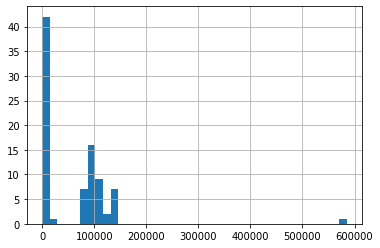

In [14]:
azdias.isnull().sum().hist(bins= 40) # rerun kernel to show previous missing values

In [15]:
for index, row in feat_info.iterrows():
    string_to_list = row['missing_or_unknown'].strip('][').split(',')
    str_list = list(filter(None, string_to_list)) # removes empty strings
    column_name = row['attribute']

        
    if azdias[column_name].dtype != object: # If the columns are not numerical
        
        int_list = list(map(int,str_list))
        
        azdias[column_name].replace(int_list,np.NaN, inplace = True)
        
    else:
        azdias[column_name].replace(str_list,np.NaN, inplace = True)

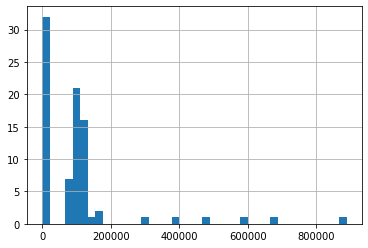

In [16]:
missing_value_cols = azdias.isnull().sum()
missing_value_cols.hist(bins= 40)
plt.show() # Plot histograms side by side after

The histogram shows that most features have between 0-200,000 missing values, with six having more than that.

In [17]:
high_missing_values = missing_value_cols[missing_value_cols > 200000]

print(high_missing_values)

AGER_TYP        685843
GEBURTSJAHR     392318
TITEL_KZ        889061
ALTER_HH        310267
KK_KUNDENTYP    584612
KBA05_BAUMAX    476524
dtype: int64


In [18]:
high_null_columns = high_missing_values.index.tolist()

print(high_null_columns)

print(feat_info[feat_info['attribute'].isin(high_null_columns)])

['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
       attribute information_level         type missing_or_unknown
0       AGER_TYP            person  categorical             [-1,0]
11   GEBURTSJAHR            person      numeric                [0]
40      TITEL_KZ            person  categorical             [-1,0]
43      ALTER_HH         household     interval                [0]
47  KK_KUNDENTYP         household  categorical               [-1]
64  KBA05_BAUMAX     microcell_rr3        mixed             [-1,0]


In [19]:
# Remove columns containing high null values

azdias = azdias.drop(high_null_columns, axis=1)

azdias.shape

(891221, 79)

In [20]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 79 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
LP_FAMILIE_FEIN          813429 non-null float64
LP_FAMILIE_GROB          813429 non-null float64
LP_STATUS_FEIN           886367 non-null float64
LP_STATUS_GROB           

#### Discussion 1.1.2: Assess Missing Data in Each Column



The histogram provided valuable information with regards to the dataset. It showed six columns containing significant amount of null values. These columns were removed they will negatively affect the quality and accuracy of the clusters to be formed later on if used.

The histogram also shows that some features contain the similar amount of missing values. This can be witnessed by observing the first bar with more than 30 features containing either a small amount of missing values or none at all. It can also be deduced by observing the densely packed group of bar charts that alot of the features do share the same number of missing values, with a minimum of 6 features sharing the same missing values or a maximum of 21.

#### Step 1.1.3: Assess Missing Data in Each Row


In [21]:
missing_value_rows = azdias.isnull().sum(axis=1)

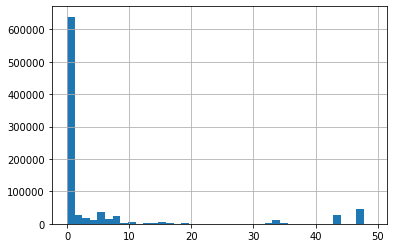

In [22]:
missing_value_rows.hist(bins= 40)
plt.show()

In [23]:
# Splits data into two subsets based on missing values in row
low_nan_rows = azdias[missing_value_rows <= 10]
high_nan_rows = azdias[missing_value_rows > 10]

In [24]:
print(low_nan_rows.shape)
print(high_nan_rows.shape)

(780153, 79)
(111068, 79)


In [25]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets. -- to be done

#### Discussion 1.1.3: Assess Missing Data in Each Row

### Step 1.2: Select and Re-Encode Features

In [26]:
feat_info.head()

attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

In [27]:
feat_info['type'].value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

In [28]:
# Get list of categorical columns
cat_cols = feat_info['attribute'][feat_info['type'] == 'categorical'].to_list()

print(cat_cols)

print(len(cat_cols))

['AGER_TYP', 'ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP', 'KK_KUNDENTYP', 'GEBAEUDETYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
21


In [29]:
dropped_cols = high_missing_values.index.to_list()

In [30]:
# Drop cat_cols that have been dropped previously

cat_cols = [col for col in cat_cols if col not in dropped_cols]

print(cat_cols)
len(cat_cols)

['ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


18

In [31]:
azdias[cat_cols].nunique()

ANREDE_KZ            2
CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
GREEN_AVANTGARDE     2
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
SOHO_KZ              2
VERS_TYP             2
ZABEOTYP             6
GEBAEUDETYP          7
OST_WEST_KZ          2
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64

In [32]:
binary_cols = azdias[cat_cols].nunique()[azdias[cat_cols].nunique() == 2].index.to_list()

In [33]:
print(azdias[binary_cols].dtypes)

azdias[binary_cols].head()

# The ost_west_kz needs to be changed to numerical values

ANREDE_KZ             int64
GREEN_AVANTGARDE      int64
SOHO_KZ             float64
VERS_TYP            float64
OST_WEST_KZ          object
dtype: object


ANREDE_KZ  GREEN_AVANTGARDE  SOHO_KZ  VERS_TYP OST_WEST_KZ
0          1                 0      NaN       NaN         NaN
1          2                 0      1.0       2.0           W
2          2                 1      0.0       1.0           W
3          2                 0      0.0       1.0           W
4          1                 0      0.0       2.0           W

In [34]:
azdias['OST_WEST_KZ'].value_counts()

W    629528
O    168545
Name: OST_WEST_KZ, dtype: int64

In [35]:
azdias.replace(['W','O'],[1,0], inplace=True)

azdias['OST_WEST_KZ'].value_counts()

1.0    629528
0.0    168545
Name: OST_WEST_KZ, dtype: int64

In [36]:
multi_cat_cols = azdias[cat_cols].nunique()[azdias[cat_cols].nunique() != 2].index.to_list()

In [37]:
multi_cat_cols

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [38]:
# One-hot encoding of categorical columns
encoded_azdias = pd.get_dummies(azdias, columns=multi_cat_cols)

In [39]:
encoded_azdias.shape

(891221, 194)

#### Discussion 1.2.1: Re-Encode Categorical Features

///

#### Step 1.2.2: Engineer Mixed-Type Features

In [40]:
encoded_azdias.dtypes.value_counts()

uint8      128
float64     43
int64       22
object       1
dtype: int64

In [41]:
# Looks like the only object column left is a mixed-type feature
encoded_azdias.dtypes[encoded_azdias.dtypes == 'object']

CAMEO_INTL_2015    object
dtype: object

In [42]:
feat_info[feat_info['type'] == 'mixed']

attribute information_level   type missing_or_unknown
15    LP_LEBENSPHASE_FEIN            person  mixed                [0]
16    LP_LEBENSPHASE_GROB            person  mixed                [0]
22  PRAEGENDE_JUGENDJAHRE            person  mixed             [-1,0]
56               WOHNLAGE          building  mixed               [-1]
59        CAMEO_INTL_2015     microcell_rr4  mixed            [-1,XX]
64           KBA05_BAUMAX     microcell_rr3  mixed             [-1,0]
79            PLZ8_BAUMAX    macrocell_plz8  mixed             [-1,0]

In [43]:
encoded_azdias['PRAEGENDE_JUGENDJAHRE'].unique()

array([nan, 14., 15.,  8.,  3., 10., 11.,  5.,  9.,  6.,  4.,  2.,  1.,
       12., 13.,  7.])

In [44]:
decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 
         11:80, 12:80, 13:80, 14:90, 15:90} # Decade
movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 
         11:1, 12:0, 13:1, 14:0, 15:1} # Mainstream=0, Avantgarde=1

encoded_azdias['decade'] = encoded_azdias['PRAEGENDE_JUGENDJAHRE'].map(decade)
encoded_azdias['movement'] = encoded_azdias['PRAEGENDE_JUGENDJAHRE'].map(movement)

encoded_azdias.drop('PRAEGENDE_JUGENDJAHRE', inplace=True, axis=1)

encoded_azdias.shape

(891221, 195)

In [45]:
encoded_azdias['CAMEO_INTL_2015'].unique()

array([nan, '51', '24', '12', '43', '54', '22', '14', '13', '15', '33',
       '41', '34', '55', '25', '23', '31', '52', '35', '45', '44', '32'],
      dtype=object)

In [46]:
encoded_azdias['wealth'] = encoded_azdias['CAMEO_INTL_2015'].str[0].astype(dtype='float')

encoded_azdias['life_stage'] = encoded_azdias['CAMEO_INTL_2015'].str[0].astype(dtype='float')

encoded_azdias.drop('CAMEO_INTL_2015', inplace=True, axis=1)

In [47]:
encoded_azdias.shape

(891221, 196)

In [48]:
# One-hot encode rest of mixed columns

In [49]:
mixed_cols = feat_info['attribute'][feat_info['type'] == 'mixed'].to_list()

In [50]:
mixed_cols

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'KBA05_BAUMAX',
 'PLZ8_BAUMAX']

In [51]:
#Removes dropped cols and also cols dealt with previously
mixed_cols = [col for col in mixed_cols if col not in dropped_cols]

mixed_cols.remove('PRAEGENDE_JUGENDJAHRE')
mixed_cols.remove('CAMEO_INTL_2015')
                   
mixed_cols

['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX']

In [52]:
#one-hot encodes rest of columns
cleaned_azdias = pd.get_dummies(encoded_azdias, columns=mixed_cols)

cleaned_azdias.shape

(891221, 257)

#### Discussion 1.2.2: Engineer Mixed-Type Features

#### Step 1.2.3: Complete Feature Selection

In [53]:
cleaned_azdias.dtypes.value_counts()

uint8      193
float64     42
int64       22
dtype: int64

In [55]:
# All features have been dealt with and converted to ints or floats

### Step 1.3: Create a Cleaning Function

In [ ]:
def clean_data(df):
    pass

#to be completed later on once its made sure that all steps above all sufficient



## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling
